# Lasso-Ridge-Reg-Car-dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\delll\Desktop\Python\DataSets\Datasets_LassoRidge\ToyotaCorolla.csv",encoding='latin-1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [42]:
col=["Price", "Age_08_04","KM" , "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
df1=df[col]
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986.0,90,1900,3,5.0,109,1152.5
1,13750,23,72937.0,90,1900,3,5.0,109,1152.5
2,13950,24,41711.0,90,1900,3,5.0,109,1152.5
3,14950,26,48000.0,90,1900,3,5.0,109,1152.5
4,13750,30,38500.0,90,1900,3,5.0,109,1152.5


In [43]:
df1.shape

(1436, 9)

In [44]:
df1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   int64  
 1   Age_08_04      1436 non-null   int64  
 2   KM             1436 non-null   float64
 3   HP             1436 non-null   int64  
 4   cc             1436 non-null   int64  
 5   Doors          1436 non-null   int64  
 6   Gears          1436 non-null   float64
 7   Quarterly_Tax  1436 non-null   int64  
 8   Weight         1436 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 101.1 KB


In [46]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10500.633008,55.958914,67604.873172,101.10376,1558.565460,4.033426,5.008721,79.169916,1068.579387
std,2981.813672,18.566512,34738.595454,13.14745,168.970222,0.952677,0.054080,14.716616,37.774625
min,4350.000000,5.000000,1.000000,69.00000,1300.000000,2.000000,4.743795,45.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.00000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,110.00000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,110.00000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,17200.000000,80.000000,153051.875000,140.00000,1900.000000,5.000000,5.309130,109.000000,1152.500000


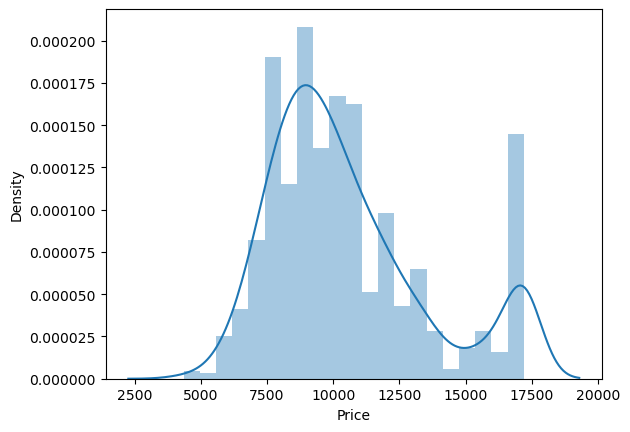

In [47]:
sns.distplot(df1["Price"])
plt.show()
# right skewed data

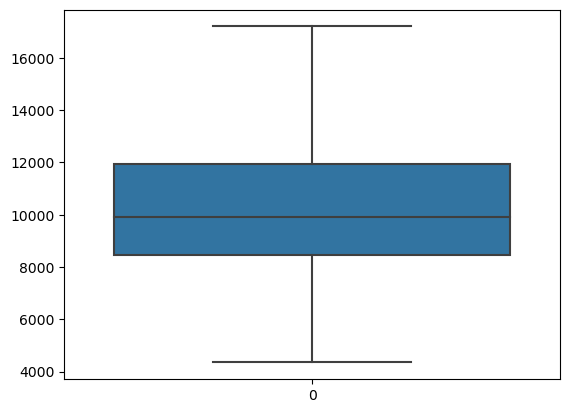

In [48]:
sns.boxplot(df1["Price"])
plt.show()
# outliers are present

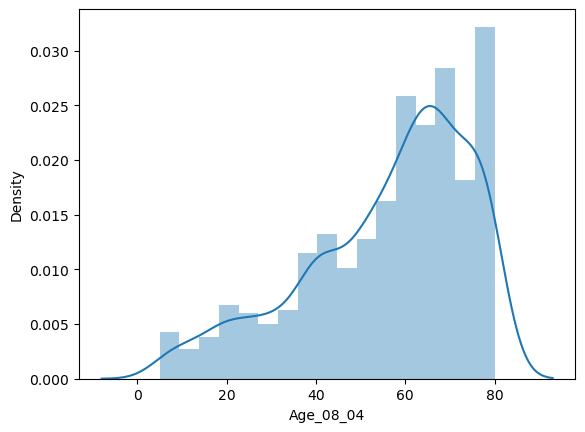

In [49]:
sns.distplot(df1["Age_08_04"])
plt.show()
# left skewed data

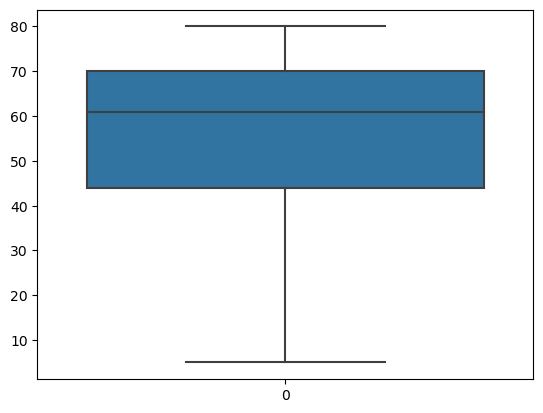

In [50]:
sns.boxplot(df1["Age_08_04"])
plt.show()

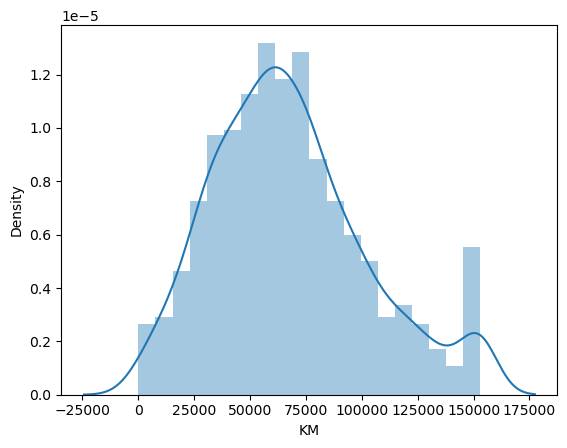

In [51]:
sns.distplot(df1["KM"])
plt.show()
# right skewed data

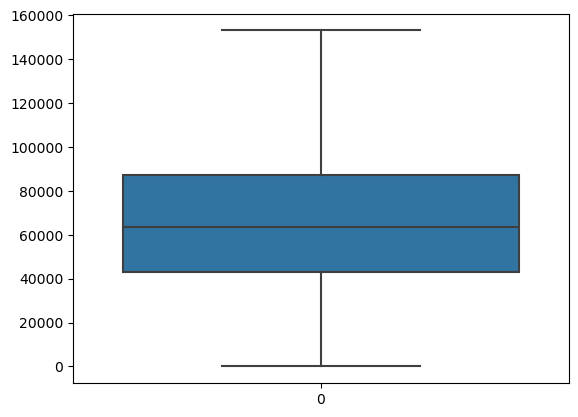

In [52]:
sns.boxplot(df1["KM"])
plt.show()
# outliers are present

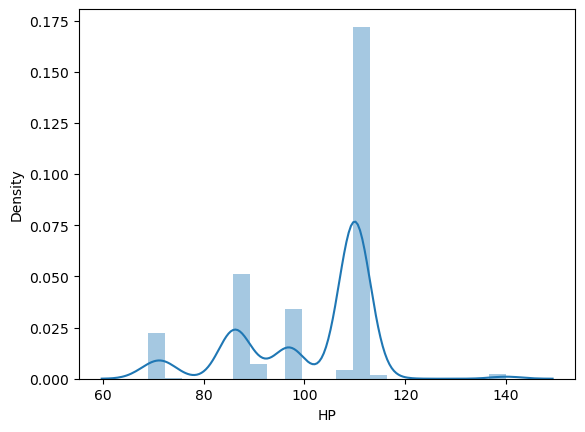

In [53]:
sns.distplot(df1["HP"])
plt.show()
# right skewed data

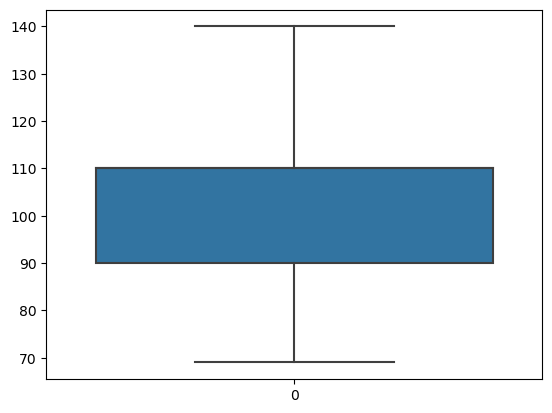

In [54]:
sns.boxplot(df1["HP"])
plt.show()
# outliers are present

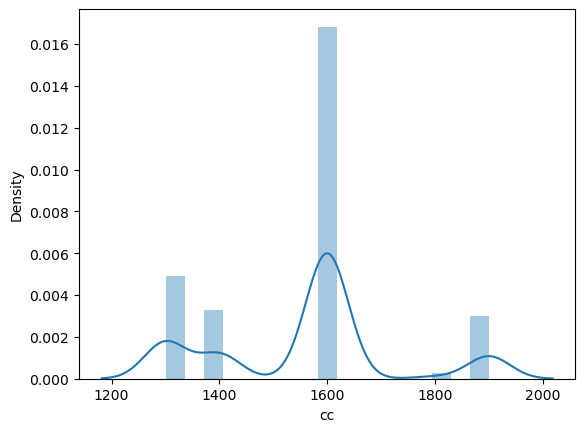

In [55]:
sns.distplot(df1["cc"])
plt.show()
# right skewed data

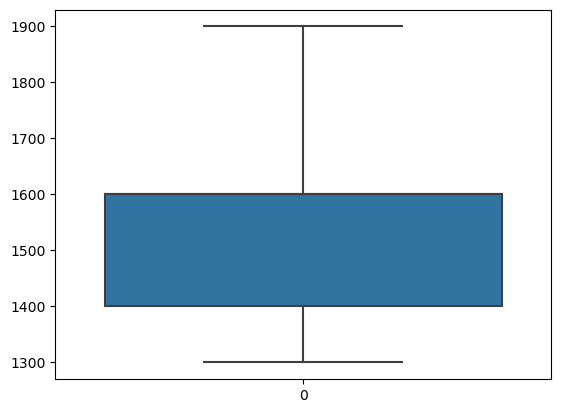

In [56]:
sns.boxplot(df1["cc"])
plt.show()
# outliers are present

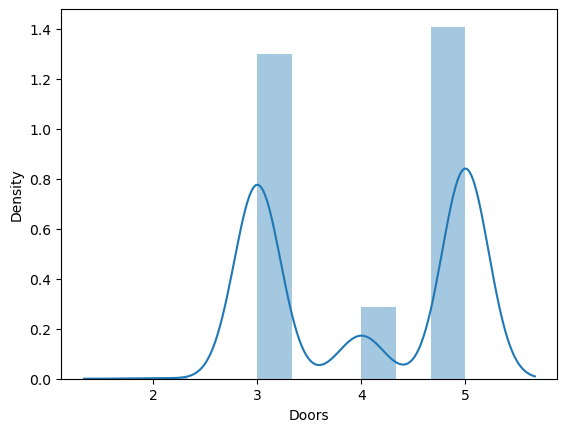

In [57]:
sns.distplot(df1["Doors"])
plt.show()

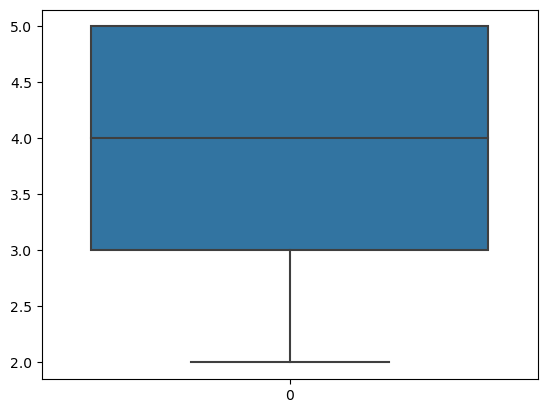

In [58]:
sns.boxplot(df1["Doors"])
plt.show()
# no outliers

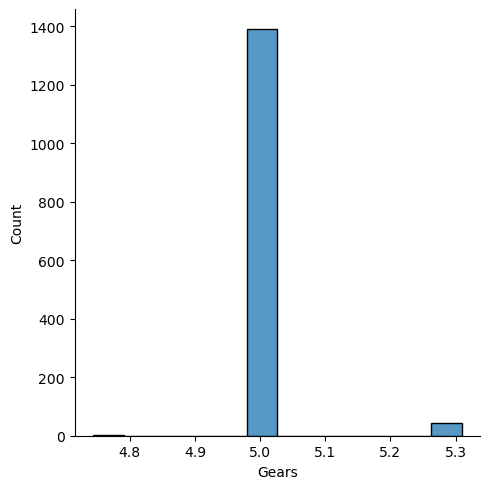

In [59]:
sns.displot(df1["Gears"])
plt.show()

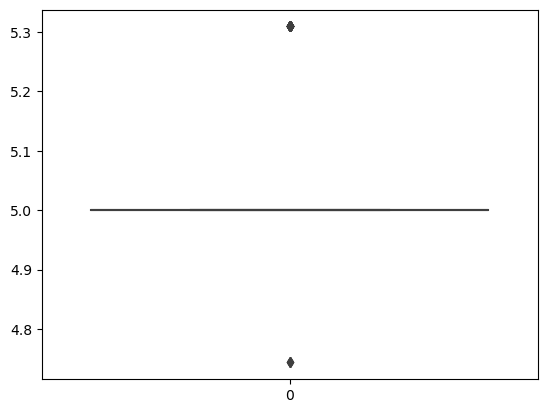

In [60]:
sns.boxplot(df1["Gears"])
plt.show()
# outliers are present

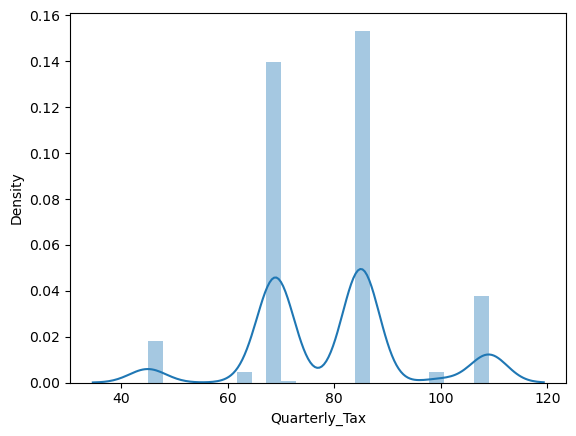

In [61]:
sns.distplot(df1["Quarterly_Tax"])
plt.show()
# right skewed data

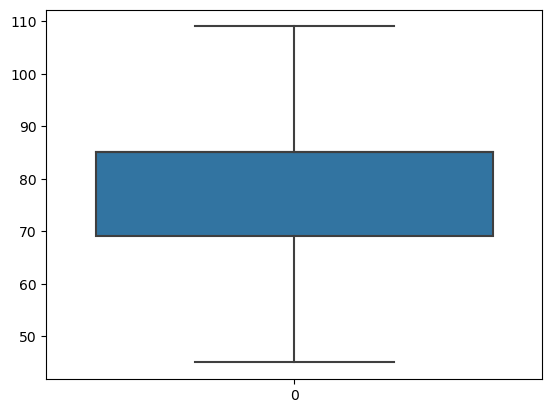

In [62]:
sns.boxplot(df1["Quarterly_Tax"])
plt.show()
# outliers are present

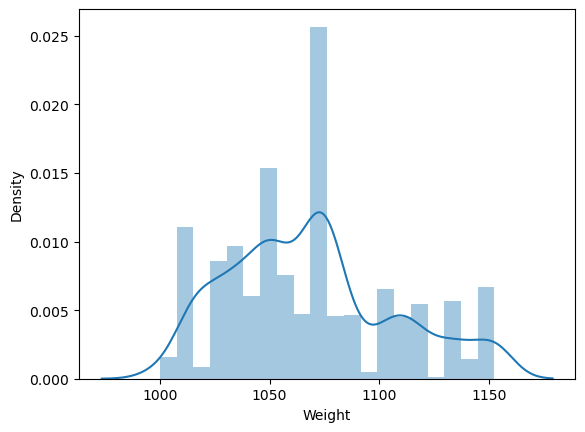

In [63]:
sns.distplot(df1["Weight"])
plt.show()
# right skewed data

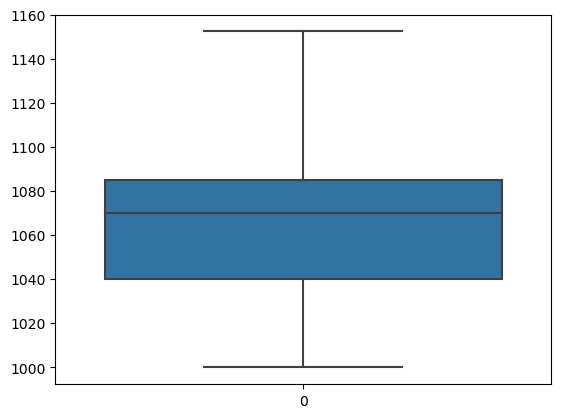

In [64]:
sns.boxplot(df1["Weight"])
plt.show()
# outliers are present

### Removal of outliers

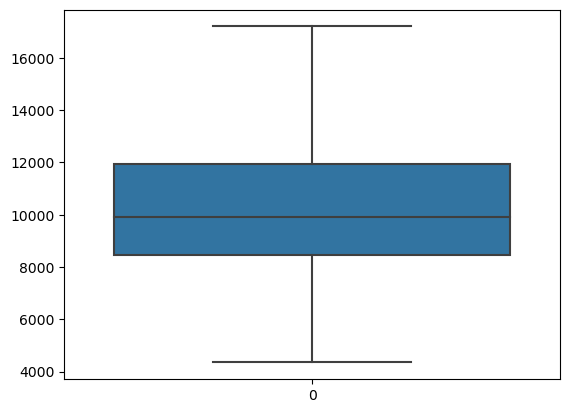

In [65]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Price",tail="both")
df["Price"]=winsor.fit_transform(df[["Price"]])
sns.boxplot(df["Price"])
plt.show()

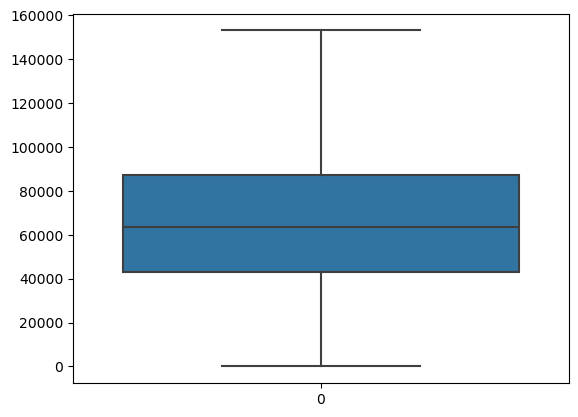

In [66]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="KM",tail="both")
df["KM"]=winsor.fit_transform(df[["KM"]])
sns.boxplot(df["KM"])
plt.show()

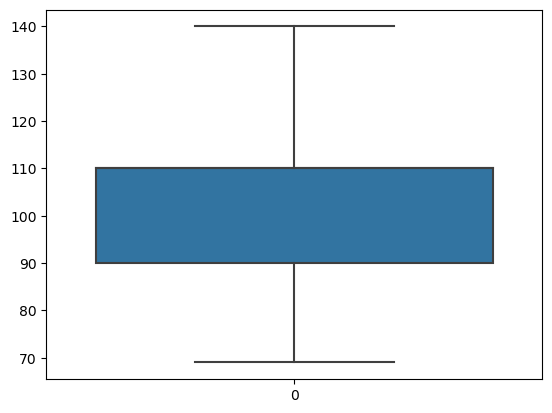

In [67]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="HP",tail="both")
df["HP"]=winsor.fit_transform(df[["HP"]])
sns.boxplot(df["HP"])
plt.show()

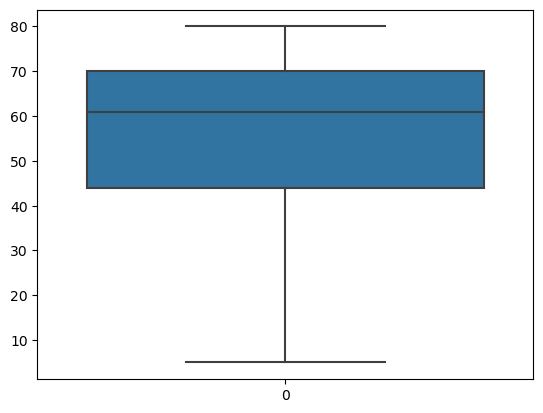

In [68]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Age_08_04",tail="both")
df["Age_08_04"]=winsor.fit_transform(df[["Age_08_04"]])
sns.boxplot(df["Age_08_04"])
plt.show()

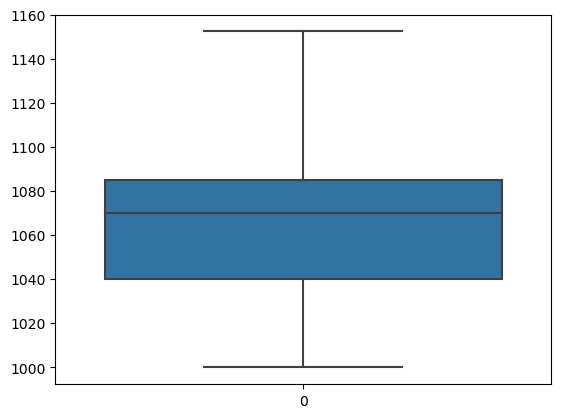

In [69]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Weight",tail="both")
df["Weight"]=winsor.fit_transform(df[["Weight"]])
sns.boxplot(df["Weight"])
plt.show()

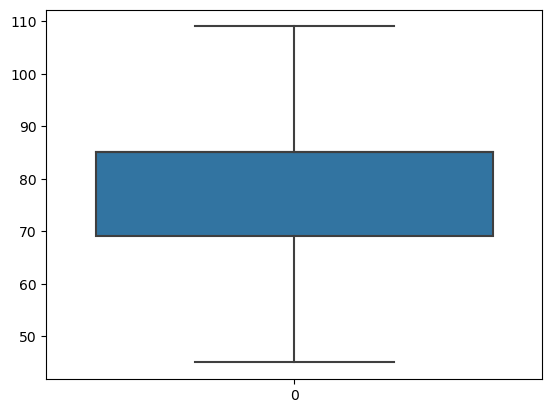

In [70]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Quarterly_Tax",tail="both")
df["Quarterly_Tax"]=winsor.fit_transform(df[["Quarterly_Tax"]])
sns.boxplot(df["Quarterly_Tax"])
plt.show()

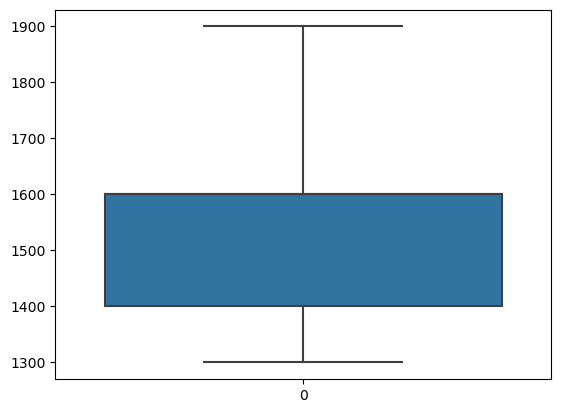

In [71]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="cc",tail="both")
df["cc"]=winsor.fit_transform(df[["cc"]])
sns.boxplot(df["cc"])
plt.show()

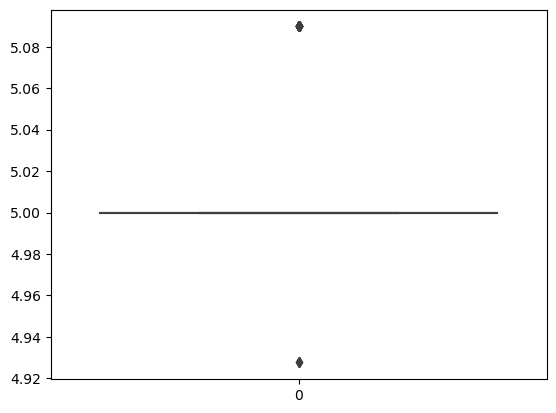

In [72]:
winsor=Winsorizer(capping_method="gaussian",fold=1.5,variables="Gears",tail="both")
df["Gears"]=winsor.fit_transform(df[["Gears"]])
sns.boxplot(df["Gears"])
plt.show()

In [73]:
# here the outliers are not romoved so simply drop this columns
df1.drop(["Gears"],axis=1,inplace=True)

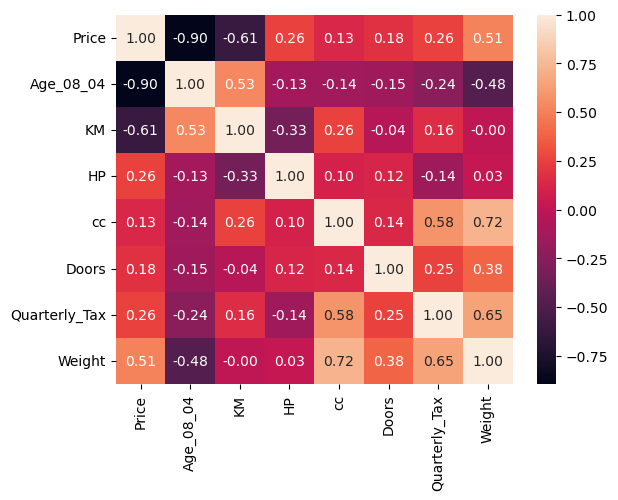

In [145]:
sns.heatmap(df1.corr(),annot=True,fmt="0.02f")
plt.show()

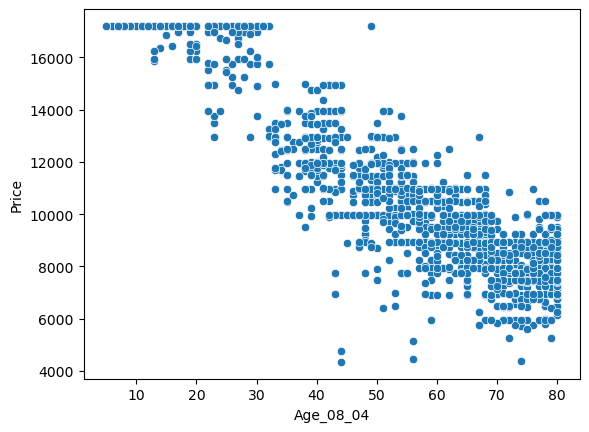

In [149]:
sns.scatterplot(x=df1["Age_08_04"],y=df1["Price"])
plt.show()
# if age of car is increasing then price of car is descreasing.

In [117]:
x=df1.drop(["Price"],axis=1)
y=df1["Price"]

In [118]:
x.head()

,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,23,46986.0,90,1900,3,109,1152.5
1,23,72937.0,90,1900,3,109,1152.5
2,24,41711.0,90,1900,3,109,1152.5
3,26,48000.0,90,1900,3,109,1152.5
4,30,38500.0,90,1900,3,109,1152.5


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [120]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [121]:
y_pred=model.predict(x_test)

In [122]:
mse=mean_squared_error(y_test,y_pred)
mse

1407078.0546313294

In [123]:
r2=r2_score(y_test,y_pred)
r2

0.846662369076906

In [124]:
model.score(x_test,y_test)

0.846662369076906

In [125]:
model.score(x_train,y_train)

0.8714956792420718

In [126]:
# model is overfit because test accuracy < training accuracy

## Apply ridge and lasso regression

In [136]:
ridge_alpha=1.0
lasso_alpha=0.1

In [137]:
ridge=Ridge(alpha=ridge_alpha)
lasso=Lasso(alpha=lasso_alpha)

In [139]:
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [140]:
ridge_pred=model.predict(x_test)
lasso_pred=model.predict(x_test)

In [141]:
r2_lasso=r2_score(y_test,lasso_pred)
print(r2_lasso)

0.846662369076906


In [142]:
r2_ridge=r2_score(y_test,ridge_pred)
print(r2_ridge)

0.846662369076906


In [143]:
ridge.score(x_train,y_train)

0.8714956777945986

In [144]:
lasso.score(x_train,y_train)

0.8714956774926855